<a href="https://colab.research.google.com/github/YazGonzalezHerrera/Metodos-numericos/blob/main/M%C3%A9todo%20Diferencias%20Divididas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tabla Diferencia Dividida
[['i   ', 'xi  ', 'fi  ', 'F[1]', 'F[2]', 'F[3]', 'F[4]', 'F[5]']]
[[0.  0.  1.  1.1 0.6 0.2 0.1 0. ]
 [1.  0.2 1.2 1.4 0.7 0.3 0.  0. ]
 [2.  0.4 1.5 1.7 0.9 0.  0.  0. ]
 [3.  0.6 1.8 2.  0.  0.  0.  0. ]
 [4.  0.8 2.2 0.  0.  0.  0.  0. ]]
Dividida: 
[1.1 0.6 0.2 0.1 0. ]
polinomio: 
0.0619791666666443*x*(x - 0.6)*(x - 0.4)*(x - 0.2) + 0.226250000000009*x*(x - 0.4)*(x - 0.2) + 0.612749999999998*x*(x - 0.2) + 1.107*x + 1.0
polinomio simplificado: 
0.0619791666666443*x**4 + 0.151875000000035*x**3 + 0.504270833333316*x**2 + 0.999575000000002*x + 1.0


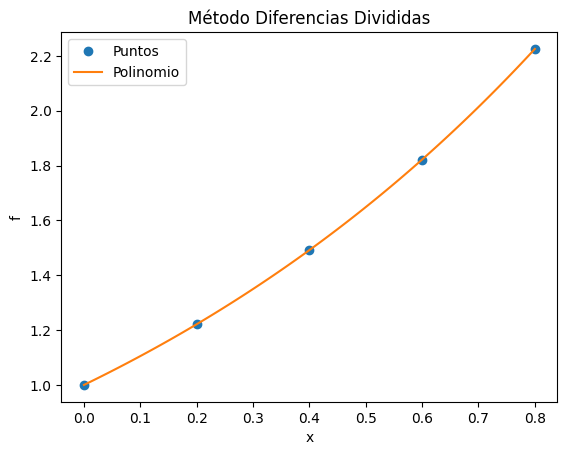

In [5]:
# Método diferencias divididas

import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

#Ejercicio 2
xi = np.array([0, 0.2, 0.4, 0.6, 0.8])
fi = np.array([1, 1.22140, 1.49182, 1.82212, 2.22554])

# Tabla de Diferencias Divididas
titulo = ['i   ','xi  ','fi  ']
n = len(xi)
ki = np.arange(0,n,1)
tabla = np.concatenate(([ki],[xi],[fi]),axis=0)
tabla = np.transpose(tabla)

dfinita = np.zeros(shape=(n,n),dtype=float)
tabla = np.concatenate((tabla,dfinita), axis=1)

[n,m] = np.shape(tabla)
diagonal = n-1
j = 3
while (j < m):

    titulo.append('F['+str(j-2)+']')

    i = 0
    paso = j-2 # inicia en 1
    while (i < diagonal):
        denominador = (xi[i+paso]-xi[i])
        numerador = tabla[i+1,j-1]-tabla[i,j-1]
        tabla[i,j] = numerador/denominador
        i = i+1

    diagonal = diagonal - 1
    j = j+1

# Polinomio con diferencias Divididas
Dividida = tabla[0,3:]
n = len(dfinita)

x = sym.Symbol('x')
polinomio = fi[0]
for j in range(1,n,1):
    factor = Dividida[j-1]
    termino = 1
    for k in range(0,j,1):
        termino = termino*(x-xi[k])
    polinomio = polinomio + termino*factor

polisimple = polinomio.expand()

px = sym.lambdify(x,polisimple)

muestras = 101
a = np.min(xi)
b = np.max(xi)
pxi = np.linspace(a,b,muestras)
pfi = px(pxi)

# Salida
np.set_printoptions(precision = 1)
print('Tabla Diferencia Dividida')
print([titulo])
print(tabla)
print('Dividida: ')
print(Dividida)
print('polinomio: ')
print(polinomio)
print('polinomio simplificado: ' )
print(polisimple)

# Gráfica
plt.plot(xi,fi,'o', label = 'Puntos')
##for i in range(0,n,1):
##    plt.axvline(xi[i],ls='--', color='blue')
plt.plot(pxi,pfi, label = 'Polinomio')
plt.legend()
plt.xlabel('x')
plt.ylabel('f')
plt.title('Método Diferencias Divididas')
plt.show()